In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
sys.path.append("../")
from functions.spike_preprocessing import spike_band_filtering

In [12]:
Fs = 30000     # sampling rate of the signal in Hz
dt = 1/Fs
gain = .5  
PRIMARY_COLOUR = "black"
T = 100000

In [13]:
df = pd.read_csv('../../tubingen_exersizes/data/nda_ex_1.csv', header=0, names=('Ch1', 'Ch2', 'Ch3', 'Ch4'))  
df.head()

,Ch1,Ch2,Ch3,Ch4
0,-141,-184,-316,-191
1,-136,-167,-290,-196
2,-168,-185,-306,-219
3,-147,-188,-332,-219
4,-165,-196,-331,-206


In [14]:
y = df['Ch1'].values

Filter the data using the custom function

In [15]:
y_filtered = spike_band_filtering(y=y, sample_rate=Fs, low=500, high=4000)

Show the difference between the filtered and unfiltered data

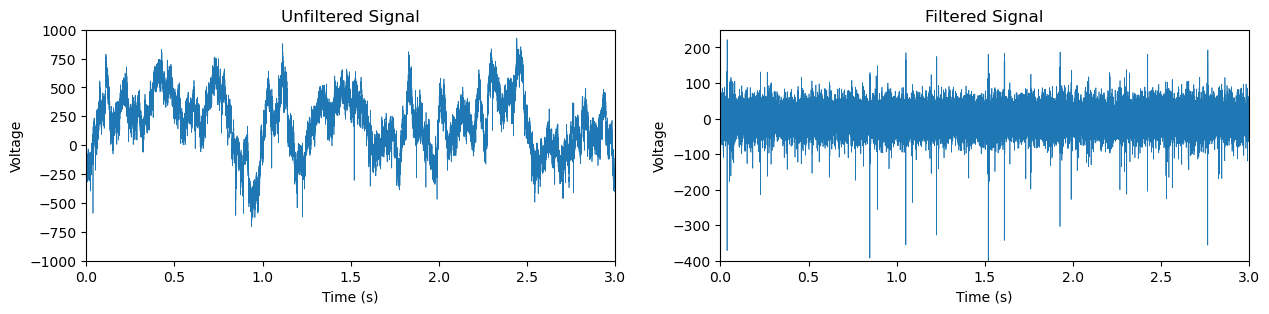

In [16]:
plt.figure(figsize=(15, 3))

t = np.arange(0, T) * dt 

# Unfiltered signal plot
plt.subplot(1, 2, 1)  # dividing the plot into 1 row, 2 columns, and selecting the first subplot
plt.plot(t, y[0:T], linewidth=.5)
plt.ylim((-1000, 1000))
plt.xlim((0, 3))
plt.ylabel('Voltage')
plt.title('Unfiltered Signal')
plt.xlabel("Time (s)")

# Filtered signal plot
plt.subplot(1, 2, 2)  # dividing the plot into 1 row, 2 columns, and selecting the second subplot
plt.plot(t, y_filtered[0:T], linewidth=.5)
plt.ylim((-400, 250))
plt.xlim((0, 3))
plt.ylabel('Voltage')
plt.title('Filtered Signal')
plt.xlabel("Time (s)")

plt.show()
